# Workshop 10 - Matplotlib

In today's workshop, we will apply what we learned about data visualisation to two different datasets, found in following files on Blackboard:
- `pi2.csv`
- `winequality-red.csv`

The first dataset contains [Unmanned Surface Vehicles Sensor Data](https://archive.ics.uci.edu/ml/datasets/GNFUV+Unmanned+Surface+Vehicles+Sensor+Data+Set+2) [[1]](#References) (please download the file `pi2.csv` from Blackboard). The data was collected by Unmanned Surface Vehicles (USV) floating over the sea surface in a coastal area of Athens, Greece. We will use this dataset to analyse a **timeseries**.

The second dataset collects information about [Wine Quality of Portugeese Wines](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) [[2]](#References) (please download the file `winequality-red.csv` from Blackboard). The different features (all real-valued) are obtained through different physiochemical tests. The final feature, `quality`, represents a label for the dataset. This will be used to visualise the relations between different measurements, and different categories (labels).

The workshop is structured as follows:
 - [Timeseries data](#Timeseries-data)
     - [Loading the data](#Loading-the-data)
     - [Exercise 1](#Exercise-1)
     - [Exercise 2](#Exercise-2)
 - [Feature analysis](#Feature-analysis)
      - [Loading the dataset](#Loading-the-dataset)
      - [Exercise 3](#Exercise-3)
      - [Exercise 4](#Exercise-4)
      - [Exercise 5](#Exercise-5)
      - [Exercise 6](#Exercise-6)
      - [Exercise 7 (extension)](#Exercise-7-(extension))
 - [(References)](#References)

In [1]:
import pandas as pd
import numpy as np

## Timeseries data

For the first part, we will work from some sensor data from collected by USV.

### Loading the data

The below cell loads the whole dataset and examines it.

In [2]:
drone_df = pd.read_csv('pi2.csv')
print(drone_df.shape)
drone_df

(1546, 6)


Device Humidity Temperature  Experiment  \
0      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   
1      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   
2      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   
3      'gnfuv-temp-exp1-55d487b85b-5g2xh'       21          40           1   
4      'gnfuv-temp-exp1-55d487b85b-5g2xh'       22          40           1   
...                                   ...      ...         ...         ...   
1541   'gnfuv-temp-exp1-55d487b85b-vhrp5'       16          42           1   
1542   'gnfuv-temp-exp1-55d487b85b-vhrp5'       16          42           1   
1543   'gnfuv-temp-exp1-55d487b85b-vhrp5'       16          42           1   
1544   'gnfuv-temp-exp1-55d487b85b-vhrp5'       16          42           1   
1545   'gnfuv-temp-exp1-55d487b85b-vhrp5'       15          42           1   

                               time   Pi  
0     2018-03-26 17:19:17.406089000  pi2  
1     2018-03-26 17:19:31.261505000  pi2  
2     2018-03-26 17:19:37.501453999  pi2  
3     2018-03-26 17:19:43.741481000  pi2  
4     2018-03-26 17:19:49.996507000  pi2  
...                             ...  ...  
1541  2018-03-26 19:26:55.753523000  pi2  
1542  2018-03-26 19:27:07.479116000  pi2  
1543  2018-03-26 19:27:11.181985000  pi2  
1544  2018-03-26 19:27:19.227230000  pi2  
1545  2018-03-26 19:27:43.590843000  pi2  

[1546 rows x 6 columns]

We can see that there are multiple devices given in the `Device` column. Let us rename the devices with numbers:

In [3]:
drone_df.replace(drone_df['Device'].unique(), range(drone_df['Device'].nunique()), inplace=True)
drone_df

Device Humidity Temperature  Experiment                           time  \
0          0       21          40           1  2018-03-26 17:19:17.406089000   
1          0       21          40           1  2018-03-26 17:19:31.261505000   
2          0       21          40           1  2018-03-26 17:19:37.501453999   
3          0       21          40           1  2018-03-26 17:19:43.741481000   
4          0       22          40           1  2018-03-26 17:19:49.996507000   
...      ...      ...         ...         ...                            ...   
1541       8       16          42           1  2018-03-26 19:26:55.753523000   
1542       8       16          42           1  2018-03-26 19:27:07.479116000   
1543       8       16          42           1  2018-03-26 19:27:11.181985000   
1544       8       16          42           1  2018-03-26 19:27:19.227230000   
1545       8       15          42           1  2018-03-26 19:27:43.590843000   

       Pi  
0     pi2  
1     pi2  
2     pi2  
3     pi2  
4     pi2  
...   ...  
1541  pi2  
1542  pi2  
1543  pi2  
1544  pi2  
1545  pi2  

[1546 rows x 6 columns]

Finally, for further processing, we will work with `Humidity` as sensed by `Device` 0. We can also see that our `time` column is in timestamps, while we would like to know the time (in seconds) from the beginning of the experiment so we could plot the timeseries.

The following cell selects the appropriate data, so that:
- `x_all` contains all the times (in seconds) since the start of the experiment when the measurements were taken
- `y_all` contains all the humidity experiments at the times given by `x_all`

In [4]:
from datetime import timedelta

device0 = drone_df[drone_df.Device == 0].copy()
device0.time = pd.to_datetime(drone_df.time)
device0.diff = device0.time.diff()
device0.diff[0] = pd.Timedelta(0)

x_all = device0.diff.cumsum().dt.total_seconds().values
y_all = device0.Humidity.values.astype(float)

### Exercise 1
#### Displaying the data

In [5]:
import matplotlib.pyplot as plt

In the following cell, plot the humidity values represented in `y_all`, measured at times `x_all`. Label your axis.

Remember, as these are sparse measurements, so `scatter` would be more appropriate than `plot`.

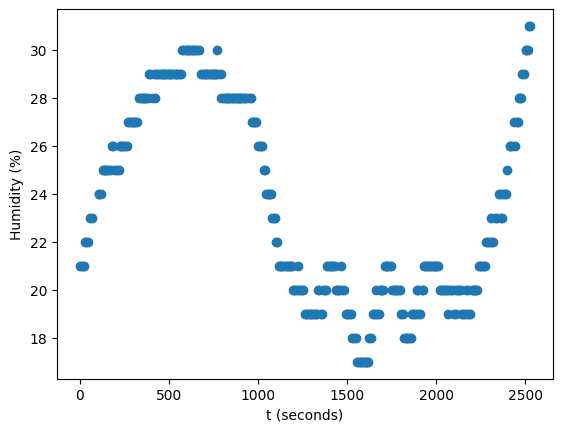

In [6]:
fig, ax = plt.subplots()

ax.scatter(x_all, y_all)
ax.set_xlabel('t (seconds)')
ax.set_ylabel('Humidity (%)')

plt.show()

### Exercise 2 
#### Interpolating the data

For this part of the exercise, let us only work with the first 30 measurements of the data. Do the following to produce the figure below:
- select the first 30 measurements from `x_all` and `y_all`
- create a figure
- display the result of the `linear` interpolation of these measurements
- label your plot to produce the legend
- label all your axis

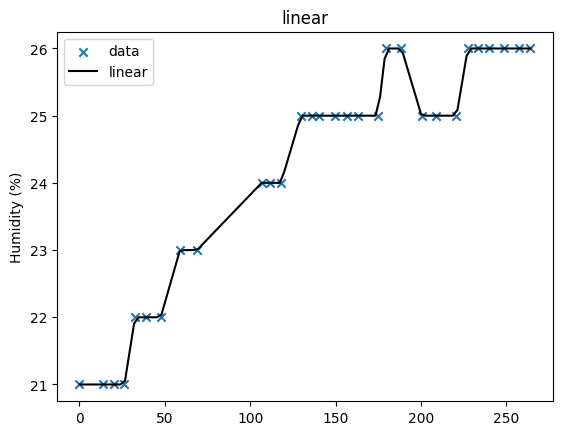

In [7]:
fig, ax = plt.subplots()

x = x_all[:30]
y = y_all[:30]

xfine = np.linspace(x[0], x[-1], 100)
yfine = np.interp(xfine, x, y)

ax.scatter(x, y, marker='x', label='data')
ax.plot(xfine, yfine, label = 'linear', c='k')
ax.set_ylabel('Humidity (%)')
ax.set_title('linear')
ax.legend()

plt.show()

## Feature analysis

For analysing the relationships between different measured features, we will work with a dataset measuring the quality of (red) wine.

### Loading the data

Let us first load the dataset and look at how many samples and features we have.

In this dataset, all features are real-valued (float), except the `quality` feature, which is our label.

In [8]:
wines_df = pd.read_csv('winequality-red.csv', sep = ';')
print(wines_df.shape)
wines_df

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

### Exercise 3

For this exercise, we will look into the relation between `fixed acidity` and `pH` of all wines. To create the figure, do the following steps:
- Plot the value of these features for all wines in our dataset.
- Calculate the best straight line estimate with linear regression, obtaining the slope and intercept of the best line estimate
- Plot the line estimate of the relationship between these features.
- Label your data and display a lagend, and label your axis and your plot.

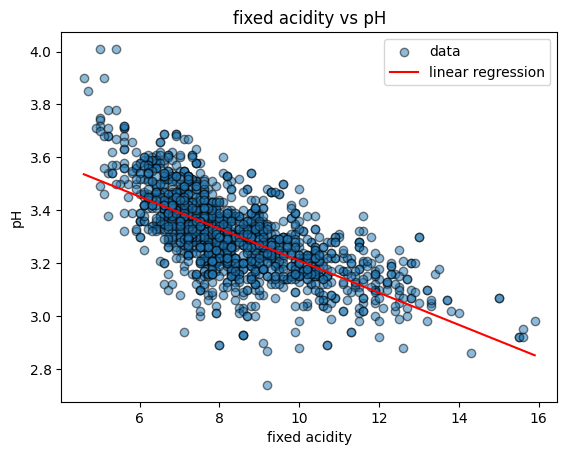

In [9]:
fig, ax = plt.subplots()

ax.scatter(wines_df['fixed acidity'], wines_df['pH'], alpha=0.5, edgecolor='black', label = 'data')
slope, intercept = np.polyfit(wines_df['fixed acidity'], wines_df['pH'], 1)

min_x = wines_df['fixed acidity'].min()
max_x = wines_df['fixed acidity'].max()
x = np.linspace(min_x, max_x, 100)

ax.plot(x, intercept + slope*x, 'r', label='linear regression')

ax.set_xlabel('fixed acidity')
ax.set_ylabel('pH')
ax.set_title('fixed acidity vs pH')
ax.legend()

plt.show()

### Exercise 4

For this exercise, we will be looking at a single feature, `volatile acidity`. First, display a histogram showing the acidity distribution for all different wines from our dataset. Use 50 bins on your histogram. Label your axis.

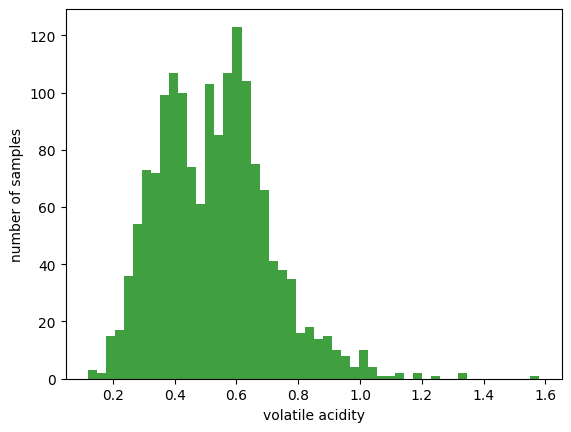

In [10]:
feature = 'volatile acidity'

fig, ax = plt.subplots()

n, bins, patches = ax.hist(wines_df[feature], 50, density=False, facecolor='g', alpha=0.75)

ax.set_xlabel(feature)
ax.set_ylabel('number of samples')
    
plt.show()

### Exercise 5

Next, compare the `volatile acidity` of wines of quality 5 and 6:
- Create two `Axes` with shared x axes
- Create two histograms (like above) of `volatile acidity` for wines of quality 5 and 6, making sure you display them on the same range and using the same bins
- Make sure these histograms show the _relative_ amount of samples in % rather for each bin, so we can compare the histograms
- Label everything

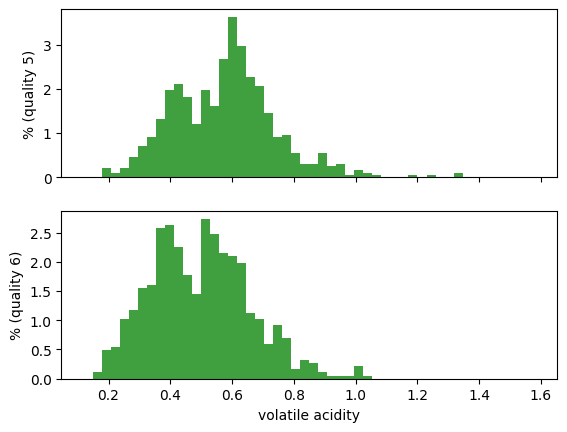

In [11]:
feature = 'volatile acidity'

fig, axs = plt.subplots(2, 1, sharex = True)

min_x = wines_df[feature].min()
max_x = wines_df[feature].max()

n0, bins0, patches0 = axs[0].hist(wines_df[wines_df.quality == 5][feature],
                            bins=50, range=(min_x, max_x), density=True, facecolor='g', alpha=0.75)
axs[0].set_ylabel('% (quality 5)')

n1, bins1, patches1 = axs[1].hist(wines_df[wines_df.quality == 6][feature],
                            bins=bins0, density=True, facecolor='g', alpha=0.75)
axs[1].set_ylabel('% (quality 6)')
axs[1].set_xlabel('volatile acidity')
                                     
plt.show()

### Exercise 6 (extension)

Compare the `volatile acitidy` for all qualities of wines represented in the dataset. Do this by displaying a boxplot for every wine quality, on the same graph.

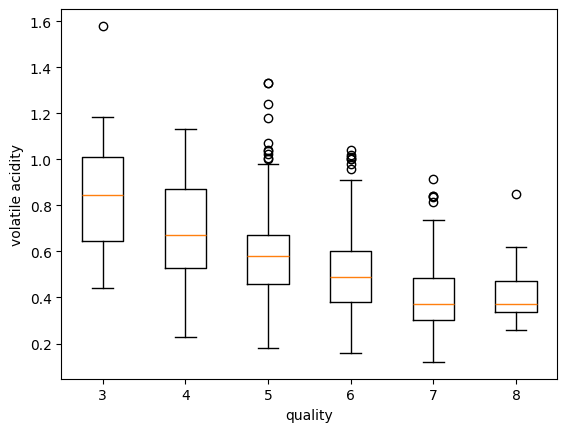

In [12]:
fig, ax = plt.subplots()

feature = 'volatile acidity'

categories = sorted(wines_df.quality.unique())
data = [wines_df[wines_df.quality==q][feature] for q in categories]

ax.boxplot(data, labels = categories)

ax.set_ylabel(feature)
ax.set_xlabel('quality')

plt.show()

### Exercise 7 (extension)

Select the last four features (`density`, `pH`, `sulphates`, `alcohol`) and the label `quality` to make a reduced dataset (only because the whole dataset can't fit on a screen).

Put the above three functionalities together (boxplot, histogram, scatter plot -- without linear regression), and produce the following _visual correlation matrix_.

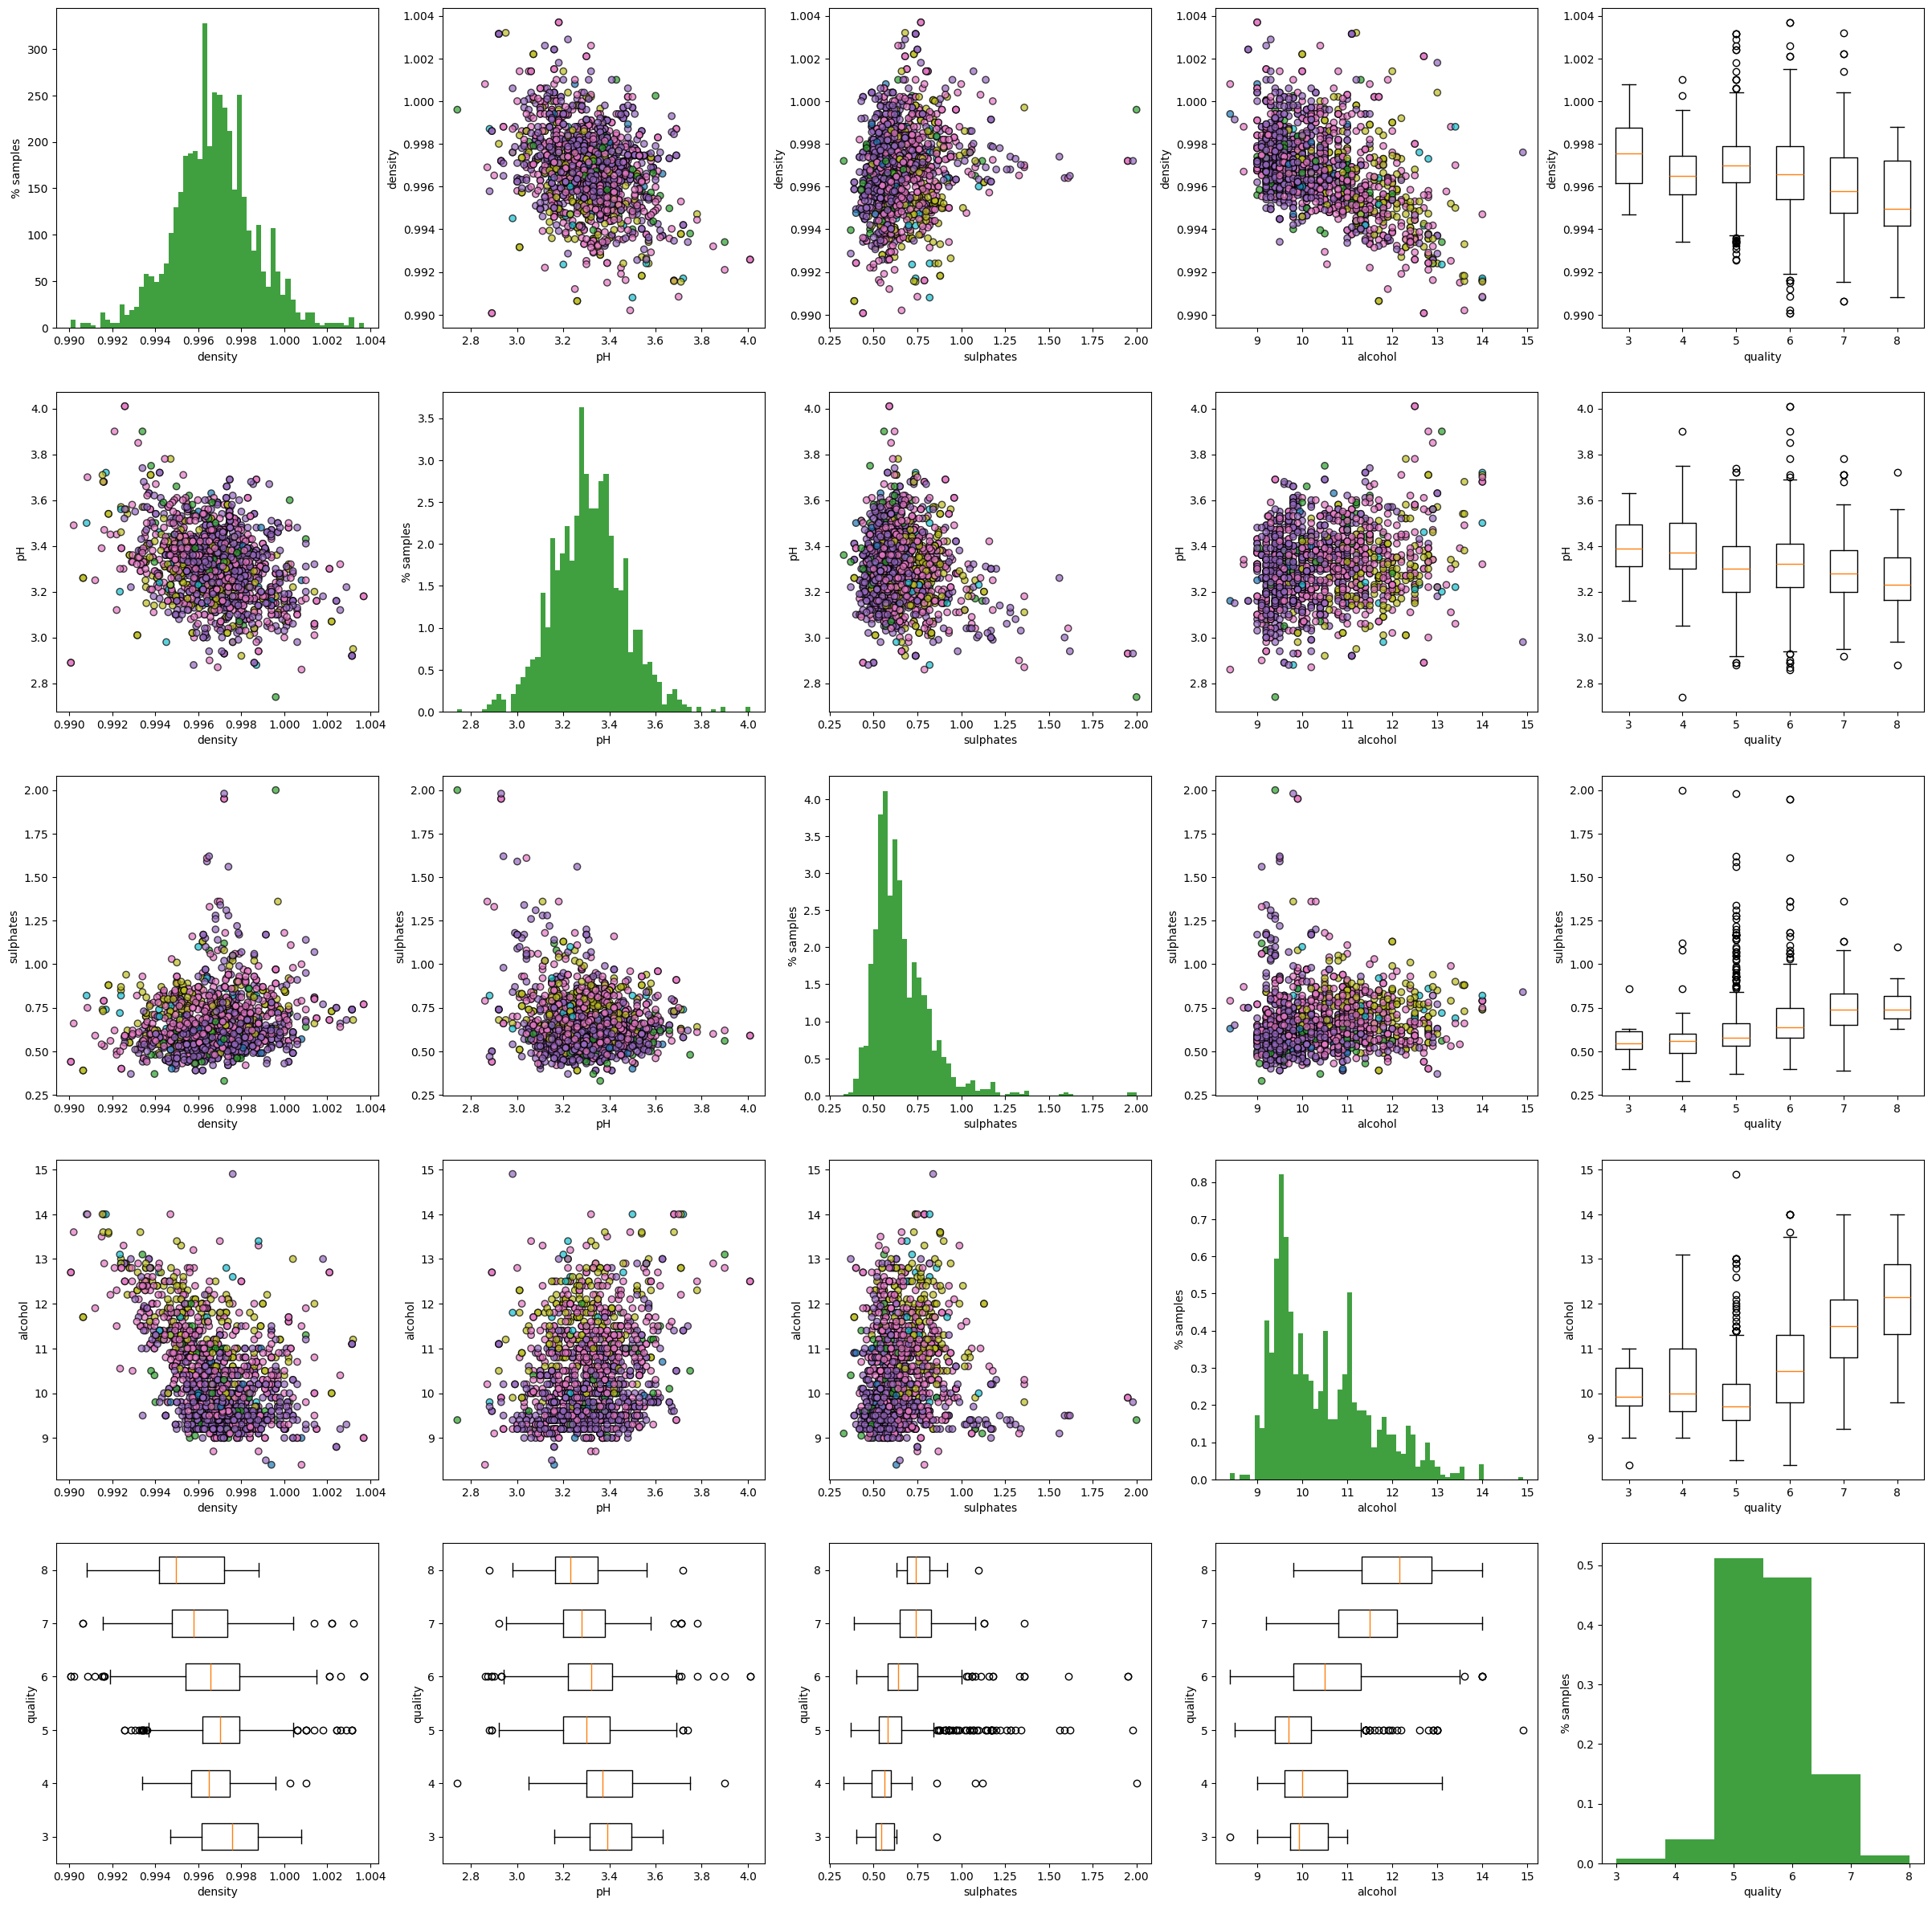

In [13]:
def make_boxplot(ax, df, column_num, column_cat, vert = True):
    categories = sorted(df[column_cat].unique())
    data = [df[df[column_cat]==v][column_num] for v in categories]

    ax.boxplot(data, labels = categories, vert = vert)

    if vert:
        ax.set_ylabel(column_num)
        ax.set_xlabel(column_cat)
    else:
        ax.set_xlabel(column_num)
        ax.set_ylabel(column_cat)
        

def make_histogram(ax, df, column):
    unique_values = df[column].nunique()
    nbins = np.amin([unique_values, 60])
    n, bins, patches = ax.hist(df[column], nbins, density=True, facecolor='g', alpha=0.75)

    ax.set_xlabel(column)
    ax.set_ylabel('% samples')
    
def make_scatter(ax, df, column_1, column_2, labels):
    scatter = ax.scatter(df[column_1], df[column_2], c=labels, cmap='tab10', alpha=0.7, edgecolor='black')

    ax.set_xlabel(column_1)
    ax.set_ylabel(column_2)
    
    #legend1 = ax.legend(*scatter.legend_elements(),
    #                loc="upper right", title="Quality")
    #ax.add_artist(legend1)
    
wines_reduced_df = wines_df[wines_df.columns[7:]]

fig, axs = plt.subplots(len(wines_reduced_df.columns),
                        len(wines_reduced_df.columns),
                        figsize = (30, 30))    

labels = wines_df.quality
for column, axc in zip(wines_reduced_df.columns, axs):
    for row, ax in zip(wines_reduced_df.columns, axc):
        if column == row:
            make_histogram(ax, wines_df, column)
        elif wines_df[column].dtype == np.int64:
            make_boxplot(ax, wines_df, row, column, False)
        elif wines_df[row].dtype == np.int64:
            make_boxplot(ax, wines_df, column, row, True)
        else:
            make_scatter(ax, wines_df, row, column, labels)

plt.show()

## References
[1] _Harth, N. and Anagnostopoulos, C., 2018, July. Edge-centric efficient regression analytics. In 2018 IEEE International Conference on Edge Computing (EDGE) (pp. 93-100). IEEE._

[2] _Cortez, P., Cerdeira, A., Almeida, F., Matos, T. and Reis, J., 2009. Modeling wine preferences by data mining from physicochemical properties. Decision support systems, 47(4), pp.547-553._